# Demo IPDxIRR_2F (ionospheric plasma densities)

> Authors: Ashley Smith
>
> Abstract: Access to the derived plasma characteristics at 1Hz (level 2 product).

In [1]:
# %load_ext watermark
# %watermark -i -v -p viresclient,pandas,xarray,matplotlib

In [2]:
from viresclient import SwarmRequest
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

request = SwarmRequest()

## IPDxIRR_2F product information

Derived plasma characteristics at 1Hz, for each Swarm spacecraft.

Documentation:
- https://earth.esa.int/web/guest/missions/esa-eo-missions/swarm/data-handbook/level-2-product-definitions#IPDxIRR_2F

### Check what "IPD" data variables are available

In [3]:
request.available_collections("IPD", details=False)

{'IPD': ['SW_OPER_IPDAIRR_2F', 'SW_OPER_IPDBIRR_2F', 'SW_OPER_IPDCIRR_2F']}

In [4]:
request.available_measurements("IPD")

['Ne',
 'Te',
 'Background_Ne',
 'Foreground_Ne',
 'PCP_flag',
 'Grad_Ne_at_100km',
 'Grad_Ne_at_50km',
 'Grad_Ne_at_20km',
 'Grad_Ne_at_PCP_edge',
 'ROD',
 'RODI10s',
 'RODI20s',
 'delta_Ne10s',
 'delta_Ne20s',
 'delta_Ne40s',
 'Num_GPS_satellites',
 'mVTEC',
 'mROT',
 'mROTI10s',
 'mROTI20s',
 'IBI_flag',
 'Ionosphere_region_flag',
 'IPIR_index',
 'Ne_quality_flag',
 'TEC_STD']

## Fetch three hours of IPD data

In [5]:
request.set_collection("SW_OPER_IPDAIRR_2F")
request.set_products(measurements=request.available_measurements("IPD"))
data = request.get_between(
    dt.datetime(2014,12,21, 0),
    dt.datetime(2014,12,21, 3)
)

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:01, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (2.273MB)


### Load and plot using pandas/matplotlib

In [6]:
df = data.as_dataframe()
df.head()

,Ne_quality_flag,Ionosphere_region_flag,Foreground_Ne,Grad_Ne_at_50km,mVTEC,mROTI20s,IPIR_index,Num_GPS_satellites,Longitude,mROT,...,Ne,Grad_Ne_at_PCP_edge,Background_Ne,ROD,delta_Ne20s,TEC_STD,RODI10s,Grad_Ne_at_100km,PCP_flag,Radius
2014-12-21 00:00:00.197000027,1000,0,1305371.000,-0.403940,46.875010,0.002623,7,4,-128.772604,-0.007534,...,1255163.2,0.0,1343147.625,0.0,10266.500,2.282493,10238.517220,-0.084919,0,6.840404e+06
2014-12-21 00:00:01.197000027,1000,0,1294037.250,0.144877,46.858859,0.002574,6,4,-128.773822,-0.007534,...,1250357.6,0.0,1343147.625,0.0,2830.850,2.277975,3263.138721,-0.144009,0,6.840413e+06
2014-12-21 00:00:02.197000027,1000,0,1312436.750,-0.123734,46.846395,0.003042,6,4,-128.775026,-0.005997,...,1265851.3,0.0,1343147.625,0.0,0.000,2.271013,3263.138721,-0.058276,0,6.840422e+06
2014-12-21 00:00:03.197000027,1000,0,1312436.750,-0.131441,46.833033,0.003912,6,4,-128.776229,-0.005841,...,1312436.8,0.0,1343147.625,0.0,2194.925,2.266208,3263.138721,-0.144613,0,6.840431e+06
2014-12-21 00:00:04.197000027,1000,0,1315059.375,-0.403369,46.820935,0.004419,6,4,-128.777432,-0.005841,...,1253999.0,0.0,1343147.625,0.0,9491.525,2.259809,3263.138721,-0.039358,0,6.840440e+06


In [7]:
df.columns

Index(['Ne_quality_flag', 'Ionosphere_region_flag', 'Foreground_Ne',
       'Grad_Ne_at_50km', 'mVTEC', 'mROTI20s', 'IPIR_index',
       'Num_GPS_satellites', 'Longitude', 'mROT', 'delta_Ne10s',
       'Grad_Ne_at_20km', 'RODI20s', 'mROTI10s', 'Spacecraft', 'delta_Ne40s',
       'Te', 'IBI_flag', 'Latitude', 'Ne', 'Grad_Ne_at_PCP_edge',
       'Background_Ne', 'ROD', 'delta_Ne20s', 'TEC_STD', 'RODI10s',
       'Grad_Ne_at_100km', 'PCP_flag', 'Radius'],
      dtype='object')

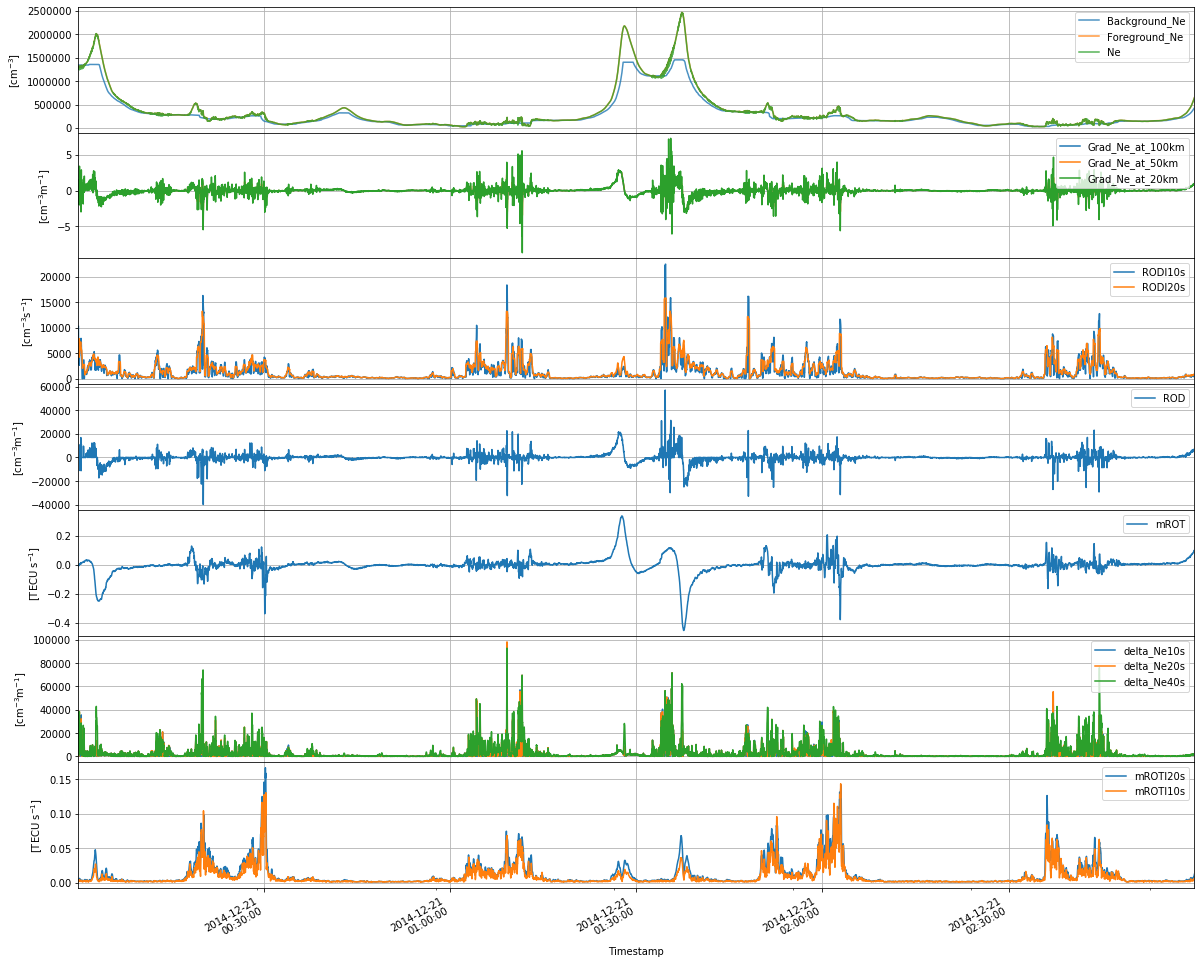

In [8]:
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(20,18), sharex=True)
df.plot(ax=axes[0], y=['Background_Ne', 'Foreground_Ne', 'Ne'], alpha=0.8)
df.plot(ax=axes[1], y=['Grad_Ne_at_100km', 'Grad_Ne_at_50km', 'Grad_Ne_at_20km'])
df.plot(ax=axes[2], y=['RODI10s', 'RODI20s'])
df.plot(ax=axes[3], y=['ROD'])
df.plot(ax=axes[4], y=['mROT'])
df.plot(ax=axes[5], y=['delta_Ne10s', 'delta_Ne20s', 'delta_Ne40s'])
df.plot(ax=axes[6], y=['mROTI20s', 'mROTI10s'])
axes[0].set_ylabel("[cm$^{-3}$]")
axes[1].set_ylabel("[cm$^{-3}$m$^{-1}$]")
axes[2].set_ylabel("[cm$^{-3}$s$^{-1}$]")
axes[3].set_ylabel("[cm$^{-3}$m$^{-1}$]")
axes[4].set_ylabel("[TECU s$^{-1}$]")
axes[5].set_ylabel("[cm$^{-3}$m$^{-1}$]")
axes[6].set_ylabel("[TECU s$^{-1}$]")
axes[6].set_xlabel("Timestamp")

for ax in axes:
    # Reformat time axis
    # https://www.earthdatascience.org/courses/earth-analytics-python/use-time-series-data-in-python/customize-dates--matplotlib-plots-python/
    ax.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d\n%H:%M:%S"))
    ax.legend(loc="upper right")
    ax.grid()
fig.subplots_adjust(hspace=0)

### Load as xarray

In [9]:
ds = data.as_xarray()
ds

<xarray.Dataset>
Dimensions:                 (Timestamp: 10800)
Coordinates:
  * Timestamp               (Timestamp) datetime64[ns] 2014-12-21T00:00:00.197000027 ... 2014-12-21T02:59:59.197000027
Data variables:
    Spacecraft              (Timestamp) object 'A' 'A' 'A' 'A' ... 'A' 'A' 'A'
    Ne_quality_flag         (Timestamp) int32 1000 1000 1000 ... 1000 1000 1000
    Foreground_Ne           (Timestamp) float64 1.305e+06 ... 6.488e+05
    mROTI20s                (Timestamp) float64 0.002623 0.002574 ... 0.01216
    Longitude               (Timestamp) float64 -128.8 -128.8 ... -175.4 -175.4
    RODI20s                 (Timestamp) float64 7.764e+03 7.181e+03 ... 907.9
    mROTI10s                (Timestamp) float64 0.0009012 0.001761 ... 0.005962
    delta_Ne40s             (Timestamp) float64 3.811e+03 ... 1.702e+03
    IBI_flag                (Timestamp) int32 -1 -1 -1 -1 -1 ... -1 -1 -1 -1 -1
    Background_Ne           (Timestamp) float64 1.343e+06 1.343e+06 ... 4.29e+05
    ROD                     (Timestamp) float64 0.0 0.0 ... 7.28e+03 7.28e+03
    delta_Ne20s             (Timestamp) float64 1.027e+04 ... 1.702e+03
    TEC_STD                 (Timestamp) float64 2.282 2.278 2.271 ... 2.33 2.35
    Grad_Ne_at_100km        (Timestamp) float64 -0.08492 -0.144 ... 0.9621
    PCP_flag                (Timestamp) int32 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
    Radius                  (Timestamp) float64 6.84e+06 6.84e+06 ... 6.835e+06
    Grad_Ne_at_50km         (Timestamp) float64 -0.4039 0.1449 ... 0.9347 0.9775
    mVTEC                   (Timestamp) float64 46.88 46.86 ... 14.44 14.54
    IPIR_index              (Timestamp) int32 7 6 6 6 6 6 6 6 ... 4 4 4 4 4 4 4
    Num_GPS_satellites      (Timestamp) int32 4 4 4 4 4 4 4 4 ... 6 6 6 6 6 6 6
    mROT                    (Timestamp) float64 -0.007534 -0.007534 ... 0.09938
    Grad_Ne_at_20km         (Timestamp) float64 -1.048 0.3384 ... 1.002 0.9148
    Te                      (Timestamp) float64 2.212e+03 ... 1.723e+03
    Latitude                (Timestamp) float64 -4.757 -4.821 ... 24.68 24.61
    Ne                      (Timestamp) float64 1.255e+06 1.25e+06 ... 6.468e+05
    Grad_Ne_at_PCP_edge     (Timestamp) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    RODI10s                 (Timestamp) float64 1.024e+04 3.263e+03 ... 503.7
    delta_Ne10s             (Timestamp) float64 67.88 1.296e+04 ... 1.702e+03
    Ionosphere_region_flag  (Timestamp) int32 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
Attributes:
    Sources:         ['SW_OPER_IPDAIRR_2F_20141221T000000_20141221T235959_0201']
    MagneticModels:  []
    RangeFilters:    []